In [47]:
from littlefish.visulization import plotting
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd

In [48]:
simulation_folder = r"F:\little_fish_simulation_logs_8eyes_no_hidden"
min_generation = 163
max_generation = 180

population_size = 1000
turnover_rate = 0.6

mother_fish_num = int(population_size * (1 - turnover_rate))

In [49]:
life_span_df = plotting.collect_life_spans(
    simulation_folder,
    min_generation=min_generation,  # 0
    max_generation=max_generation,  # 25
)

reading generation_0000163, 1 / 18 ...
reading generation_0000164, 2 / 18 ...
reading generation_0000165, 3 / 18 ...
reading generation_0000166, 4 / 18 ...
reading generation_0000167, 5 / 18 ...
reading generation_0000168, 6 / 18 ...
reading generation_0000169, 7 / 18 ...
reading generation_0000170, 8 / 18 ...
reading generation_0000171, 9 / 18 ...
reading generation_0000172, 10 / 18 ...
reading generation_0000173, 11 / 18 ...
reading generation_0000174, 12 / 18 ...
reading generation_0000175, 13 / 18 ...
reading generation_0000176, 14 / 18 ...
reading generation_0000177, 15 / 18 ...
reading generation_0000178, 16 / 18 ...
reading generation_0000179, 17 / 18 ...
reading generation_0000180, 18 / 18 ...


In [50]:
life_span_df.sort_values(by="median_life_span")

,generation,fish_name,mean_life_span,median_life_span,is_from_last_geneartion
5258,168,fish_241220_23_25_20.537610,109.2,3.5,False
9837,172,fish_241221_01_16_40.712467,49.0,4.0,False
9786,172,fish_241221_01_16_38.183348,104.4,4.5,False
11645,174,fish_241221_02_10_31.651148,338.1,4.5,False
10905,173,fish_241221_01_44_50.829563,165.0,4.5,False
...,...,...,...,...,...
2553,165,fish_241220_22_02_54.954321,1664.5,1571.0,False
17562,180,fish_241221_04_49_59.960810,2126.9,1738.0,False
8627,171,fish_241221_00_49_11.140041,1575.8,1812.5,False
12333,175,fish_241221_02_36_27.559637,1811.8,2040.5,False


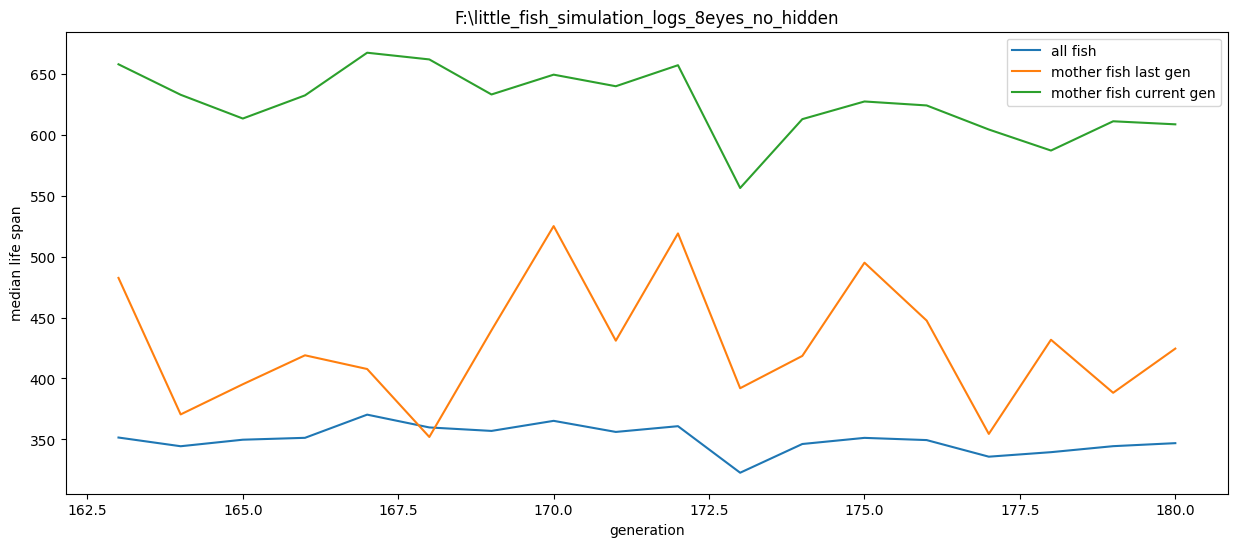

In [51]:
gens = sorted(life_span_df["generation"].unique())
median_life_span = []
median_mo_life_last_gen = []
median_mo_life_curr_gen = []
for gen in gens:
    curr_life_span = sorted(life_span_df.query("generation == @gen")["median_life_span"])
    median_life_span.append(np.mean(curr_life_span))
    median_mo_life_last_gen.append(np.median(life_span_df.query("generation == @gen and is_from_last_geneartion")["median_life_span"]))
    median_mo_life_curr_gen.append(np.median(curr_life_span[-mother_fish_num:]))

f, ax = plt.subplots(figsize=(15, 6))
ax.plot(gens, median_life_span, label="all fish")
ax.plot(gens, median_mo_life_last_gen, label="mother fish last gen")
ax.plot(gens, median_mo_life_curr_gen, label="mother fish current gen")
ax.set_xlabel("generation")
ax.set_ylabel("median life span")
ax.set_title(simulation_folder)
ax.legend()

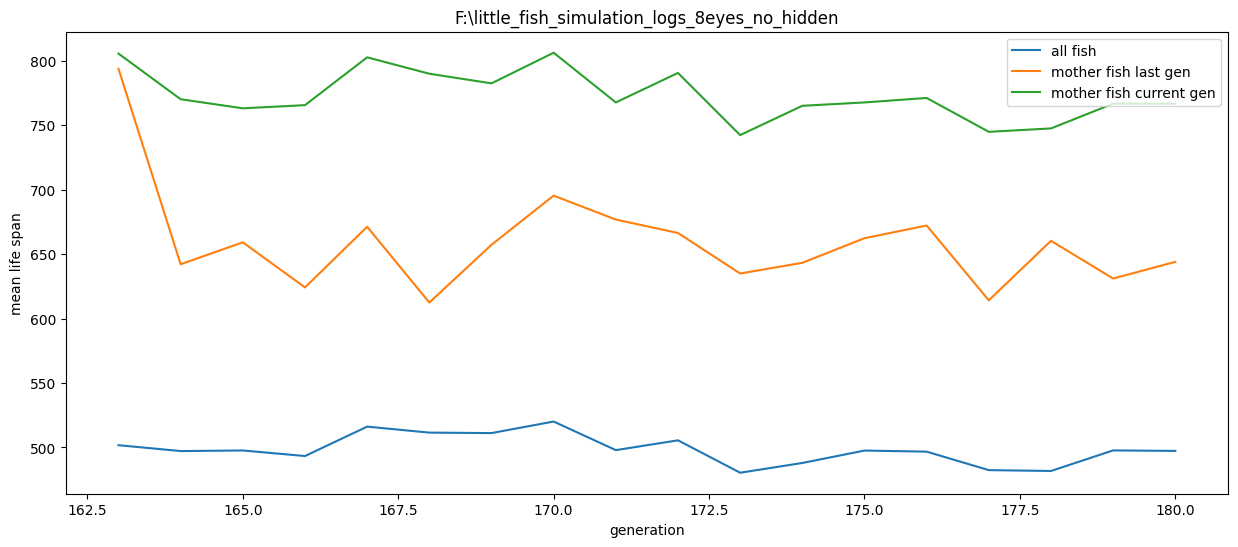

In [52]:
gens = sorted(life_span_df["generation"].unique())
mean_life_span = []
mean_mo_life_last_gen = []
mean_mo_life_curr_gen = []
for gen in gens:
    curr_life_span = sorted(life_span_df.query("generation == @gen")["mean_life_span"])
    mean_life_span.append(np.mean(curr_life_span))
    mean_mo_life_last_gen.append(np.mean(life_span_df.query("generation == @gen and is_from_last_geneartion")["mean_life_span"]))
    mean_mo_life_curr_gen.append(np.mean(curr_life_span[-mother_fish_num:]))

f, ax = plt.subplots(figsize=(15, 6))
ax.plot(gens, mean_life_span, label="all fish")
ax.plot(gens, mean_mo_life_last_gen, label="mother fish last gen")
ax.plot(gens, mean_mo_life_curr_gen, label="mother fish current gen")
ax.set_xlabel("generation")
ax.set_ylabel("mean life span")
ax.set_title(simulation_folder)
ax.legend()

(0.0, 3000.0)

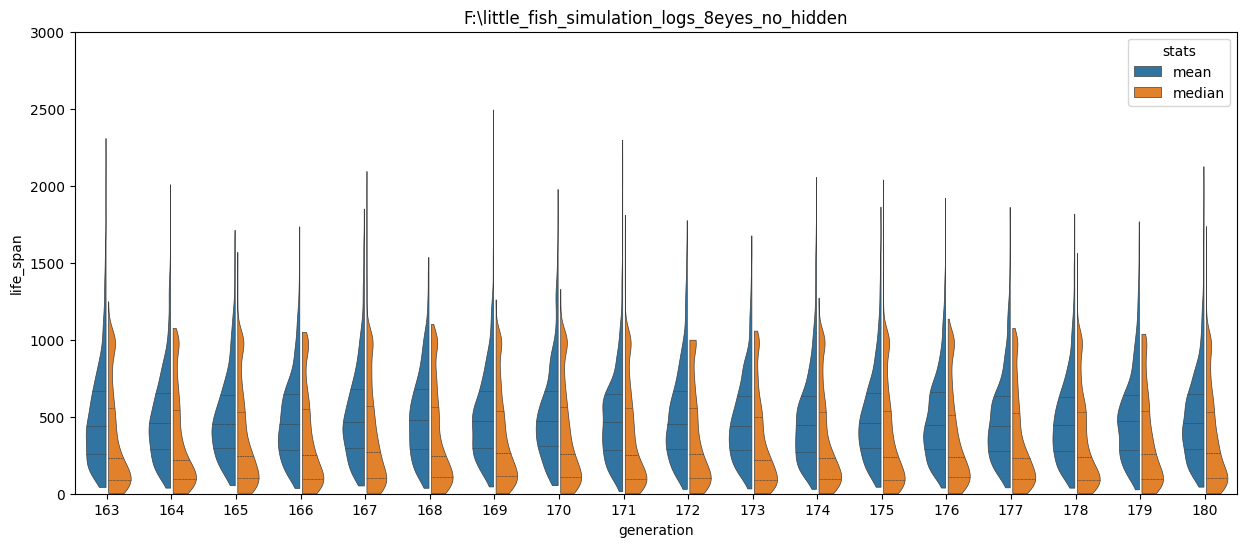

In [53]:
mean_df = life_span_df[["generation", "fish_name", "mean_life_span", "is_from_last_geneartion"]]
mean_df["stats"] = "mean"
mean_df.rename(columns={"mean_life_span": "life_span"}, inplace=True)

median_df = life_span_df[["generation", "fish_name", "median_life_span", "is_from_last_geneartion"]]
median_df["stats"] = "median"
median_df.rename(columns={"median_life_span": "life_span"}, inplace=True)

plot_df = pd.concat([mean_df, median_df]).reset_index(drop=True)

# print(plot_df)

f, ax = plt.subplots(figsize=(15, 6))
ax.set_title(simulation_folder)
sns.violinplot(
    data=plot_df, x="generation", y="life_span", hue="stats", split=True, ax=ax, cut=0, linewidth=0.5, inner="quart", gap=0.1
)
ax.set_ylim([0, 3000])